<a href="https://colab.research.google.com/github/NicolasSep/Laboratorio_1/blob/main/cars_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cars price prediction
Nicolas Sepulveda Criollo - 69614



In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
cols = ['model','price','year','kms','color','fueltype']
data = pd.read_csv('/content/Carros/usedCarsCol_prado_200624.csv', sep=',', names=cols, header=0, encoding='latin-1')
print(data.shape)
data.head()

(624, 6)


,model,price,year,kms,color,fueltype
0,Toyota Prado 2.7 Txl Sumo,$242.000.000,2021,47.000,Plateado,Gasolina
1,Toyota Prado 4.0 TX-L 7 Pasajeros 4x4,$139.000.000,2013,118.300,Blanco,Gasolina
2,Toyota Prado 3.0 Tx-l Fl 170 hp,$192.000.000,2015,85.600,Gris,DiÃ©sel
3,Toyota Prado 3.0 Tx,$148.000.000,2014,157.150,Blanco,DiÃ©sel
4,Toyota Prado 3.0 Tx,$147.000.000,2012,179.667,Gris,DiÃ©sel


In [6]:
data.dtypes

model        object
price        object
year          int64
kms         float64
color        object
fueltype     object
dtype: object

In [7]:
data.nunique()

model       226
price       346
year         29
kms         412
color         9
fueltype      3
dtype: int64

In [8]:
print(data['model'].unique().tolist())
print(data['price'].unique().tolist())
print(data['year'].unique().tolist())
print(data['kms'].unique().tolist())
print(data['color'].unique().tolist())
print(data['fueltype'].unique().tolist())

['Toyota Prado 2.7 Txl Sumo', 'Toyota Prado 4.0 TX-L 7 Pasajeros 4x4', 'Toyota Prado 3.0 Tx-l Fl 170 hp', 'Toyota Prado 3.0 Tx', 'Toyota Prado 2.7 Sumo', 'Toyota Prado 3.0 Tx-l Blindaje 2 plus', 'Toyota Prado TXL', 'Toyota Prado 3.0 Txl 4x4', 'Toyota Prado 2.7 Select', 'Toyota Prado Txl 2019', 'Toyota Prado 4.0 Tx-l Fl', 'Toyota Prado 3.4 Vx', 'Toyota Prado 2.8 Tx-l Blindaje 2 Plus 2021', 'Toyota Prado 4.0 Tx-l', 'Toyota Prado 3.0 Tx Fl', 'Toyota Prado 3.0 VX FL  TP EURO', 'Toyota Prado 4.0 VX FL 2', 'Toyota Prado ', 'Toyota Prado 3.0 Tx-l', 'Toyota Prado 2.7 Sumo Blindado', 'Toyota Prado 3.4 Vx  BLINDADO', 'Toyota Prado 4.0 Tx Ambission', 'Toyota Prado 2.7 Tx Sumo', 'Toyota Prado 2.7 4l', 'Toyota Hilux 2.7l', 'Toyota Prado 2.7 Sumo Action', 'Toyota Prado 3.0 Tx-l Fl', 'Toyota Prado 3.4', 'Toyota Prado 3.0 TX-L Diesel', 'Toyota Prado Tx 4.0cc At Aa 4x4 ', 'Toyota Prado Txl 3.0cc At Aa 4x4 ', 'Toyota Prado 2.8 Vx At6', 'Toyota Prado Tx-l Black Edition 2.800cc AutomÃ¡tica Dsl 4x4', 'Toyo

In [9]:
print(data['model'].unique().tolist())
print(data['price'].unique().tolist())
print(data['year'].unique().tolist())
print(data['kms'].unique().tolist())
print(data['color'].unique().tolist())
print(data['fueltype'].unique().tolist())

['Toyota Prado 2.7 Txl Sumo', 'Toyota Prado 4.0 TX-L 7 Pasajeros 4x4', 'Toyota Prado 3.0 Tx-l Fl 170 hp', 'Toyota Prado 3.0 Tx', 'Toyota Prado 2.7 Sumo', 'Toyota Prado 3.0 Tx-l Blindaje 2 plus', 'Toyota Prado TXL', 'Toyota Prado 3.0 Txl 4x4', 'Toyota Prado 2.7 Select', 'Toyota Prado Txl 2019', 'Toyota Prado 4.0 Tx-l Fl', 'Toyota Prado 3.4 Vx', 'Toyota Prado 2.8 Tx-l Blindaje 2 Plus 2021', 'Toyota Prado 4.0 Tx-l', 'Toyota Prado 3.0 Tx Fl', 'Toyota Prado 3.0 VX FL  TP EURO', 'Toyota Prado 4.0 VX FL 2', 'Toyota Prado ', 'Toyota Prado 3.0 Tx-l', 'Toyota Prado 2.7 Sumo Blindado', 'Toyota Prado 3.4 Vx  BLINDADO', 'Toyota Prado 4.0 Tx Ambission', 'Toyota Prado 2.7 Tx Sumo', 'Toyota Prado 2.7 4l', 'Toyota Hilux 2.7l', 'Toyota Prado 2.7 Sumo Action', 'Toyota Prado 3.0 Tx-l Fl', 'Toyota Prado 3.4', 'Toyota Prado 3.0 TX-L Diesel', 'Toyota Prado Tx 4.0cc At Aa 4x4 ', 'Toyota Prado Txl 3.0cc At Aa 4x4 ', 'Toyota Prado 2.8 Vx At6', 'Toyota Prado Tx-l Black Edition 2.800cc AutomÃ¡tica Dsl 4x4', 'Toyo

In [10]:
# Copy data and remove model variable
datacc = data
datacc = datacc.drop(['model'], axis=1)
datacc.shape

(624, 5)

In [13]:
datacc.replace({'kms': {'Publicado': 0}}, inplace=True)

In [18]:
datacc['kms'] = datacc['kms'].replace('[.]','',regex=True).astype(int)

In [19]:
# Object to categorical
datacc['color'] = datacc['color'].astype('category')
datacc['fueltype'] = datacc['fueltype'].astype('category')
datacc.dtypes

price          int64
year           int64
kms            int64
color       category
fueltype    category
dtype: object

In [20]:
# Convert to dummies
# Convert category to codes
datacc['color']  = pd.Categorical(datacc['color']).codes
datacc['fueltype']  = pd.Categorical(datacc['fueltype']).codes
datacc.head()

,price,year,kms,color,fueltype
0,242000000,2021,47,6,1
1,139000000,2013,118,1,1
2,192000000,2015,85,4,0
3,148000000,2014,157,1,0
4,147000000,2012,179,4,0


In [22]:
# Descriptive statistics
datacc.describe()[['price','year','kms']]

,price,year,kms
count,6.240000e+02,624.000000,624.000000
mean,2.022187e+08,2015.554487,106.262821
std,9.264088e+07,5.867470,70.619966
min,4.420000e+07,1993.000000,0.000000
25%,1.350000e+08,2012.000000,50.000000
50%,1.930000e+08,2016.000000,106.000000
75%,2.722500e+08,2020.000000,153.000000
max,4.490000e+08,2025.000000,600.000000


Text(0.5, 1.0, '$kms$')

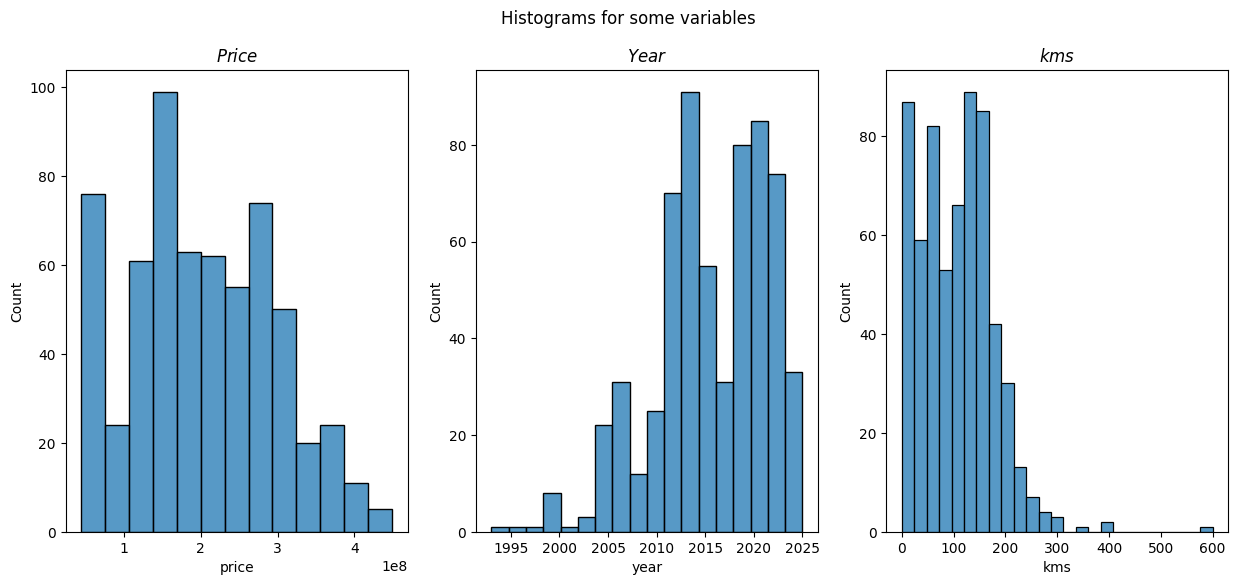

In [23]:
# Histograms
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,6))
fig.suptitle('Histograms for some variables')
sns.histplot(datacc['price'], ax=ax1)
ax1.set_title('$Price$')
sns.histplot(datacc['year'], ax=ax2)
ax2.set_title('$Year$')
sns.histplot(datacc['kms'], ax=ax3)
ax3.set_title('$kms$')

<Axes: >

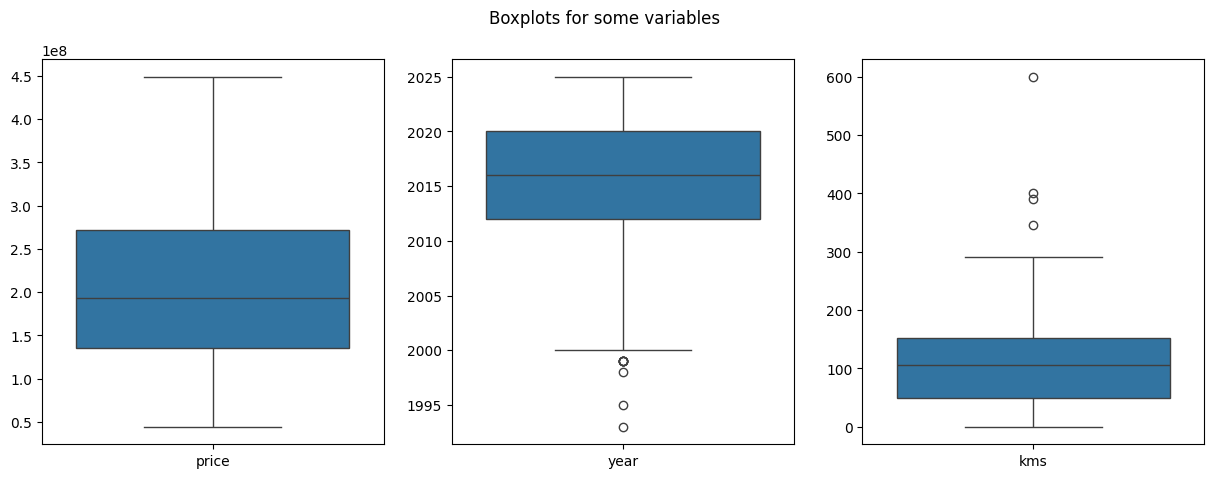

In [24]:
### Boxplot
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,5))
fig.suptitle('Boxplots for some variables')
sns.boxplot(data=datacc[['price']], ax=ax1)
sns.boxplot(data=datacc[['year']], ax=ax2)
sns.boxplot(data=datacc[['kms']], ax=ax3)

<Axes: >

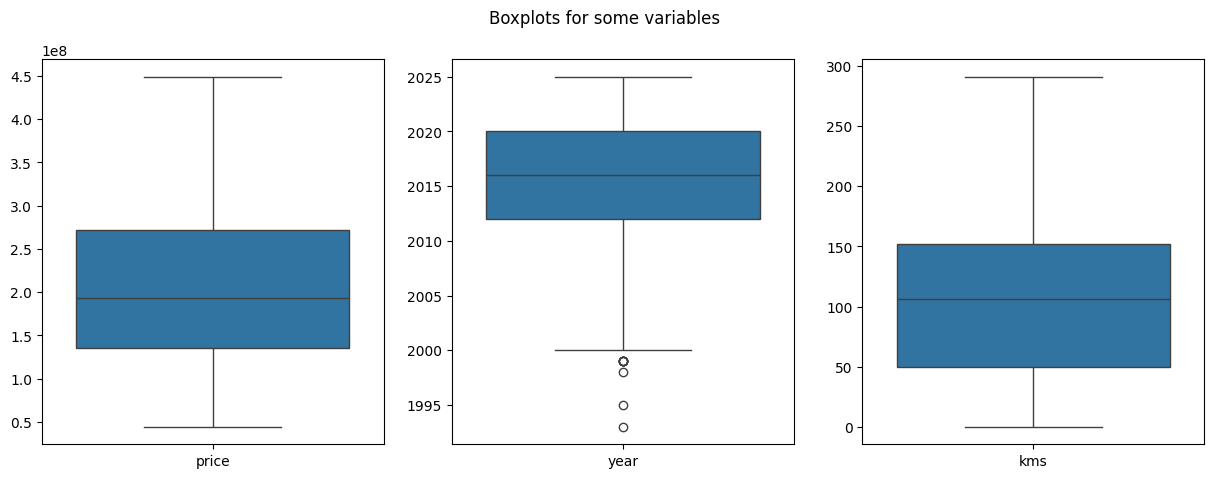

In [25]:
# Z score to eliminate outliers of 'year' and 'kms'
from scipy import stats

#find absolute value of z-score for each observation of 'kms'
z2 = np.abs(stats.zscore(datacc['kms']))

#only keep rows in dataframe with all z-scores less than absolute value of 3
toremove = datacc.kms[(z2>3)].index
datacc = datacc.drop(toremove)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,5))
fig.suptitle('Boxplots for some variables')
sns.boxplot(data=datacc[['price']], ax=ax1)
sns.boxplot(data=datacc[['year']], ax=ax2)
sns.boxplot(data=datacc[['kms']], ax=ax3)

Text(0.5, 1.0, '$kms$')

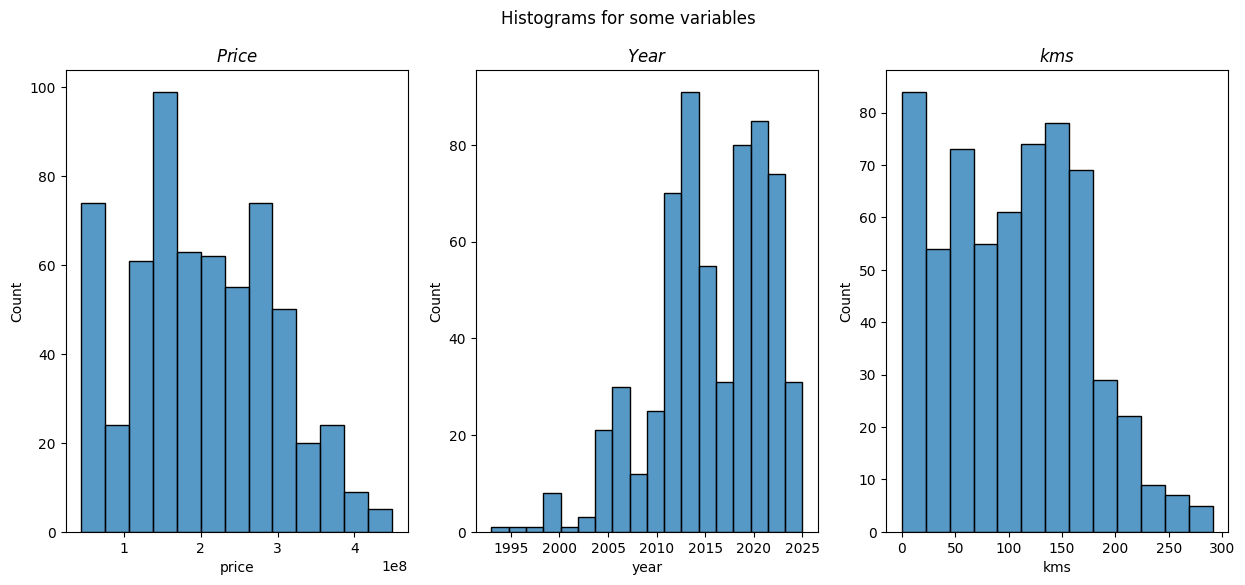

In [26]:
# Histograms
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,6))
fig.suptitle('Histograms for some variables')
sns.histplot(datacc['price'], ax=ax1)
ax1.set_title('$Price$')
sns.histplot(datacc['year'], ax=ax2)
ax2.set_title('$Year$')
sns.histplot(datacc['kms'], ax=ax3)
ax3.set_title('$kms$')

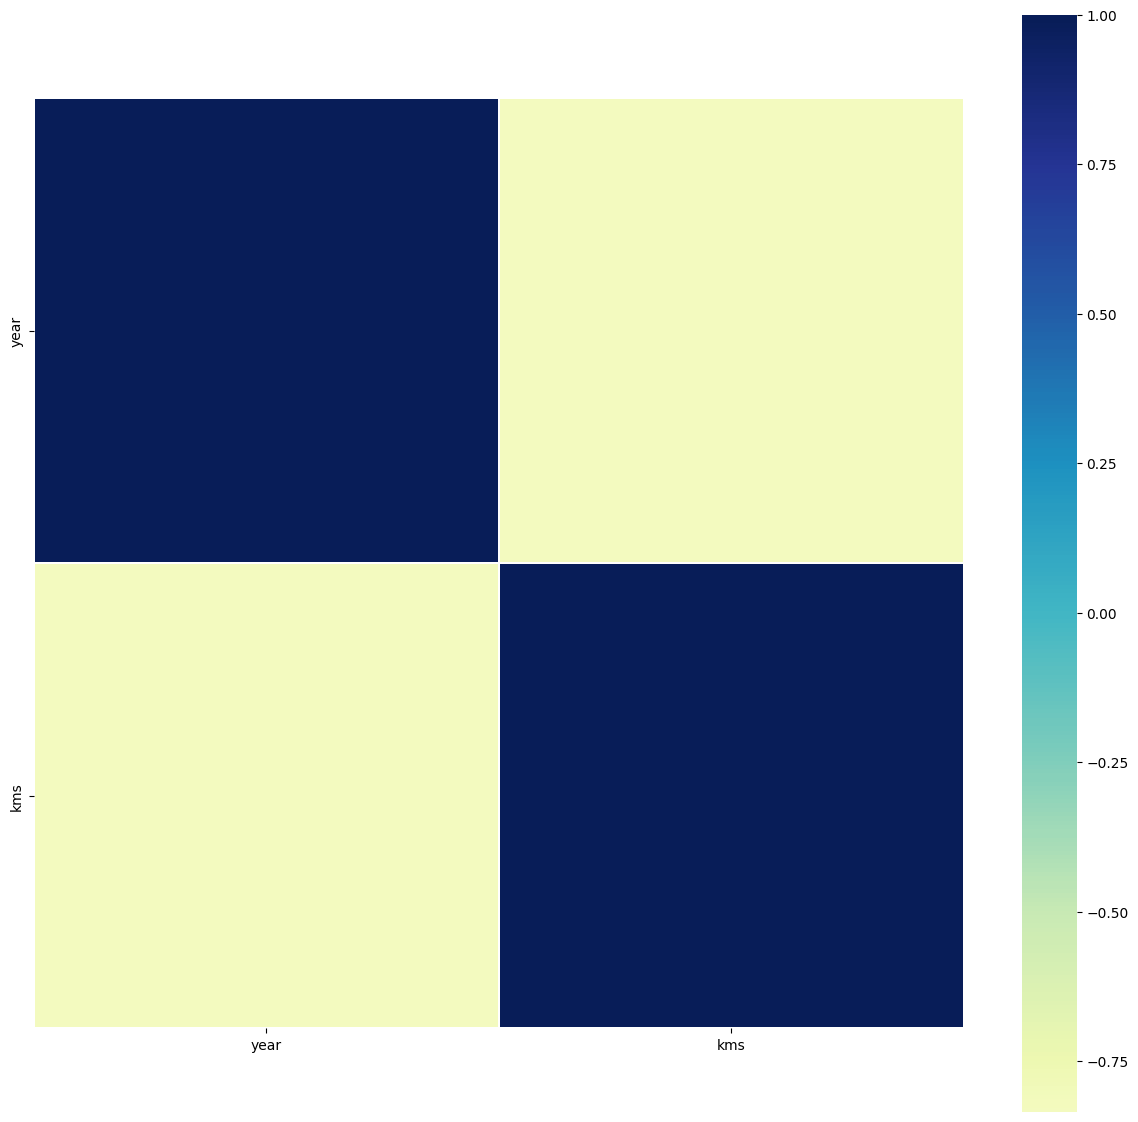

In [27]:
X = datacc.copy()
X = X.drop(['price'], axis=1)
def correlation_heatmap(train):
    correlations = train.corr()

    fig, ax = plt.subplots(figsize=(15,15))
    sns.heatmap(correlations, vmax=1.0, center=0, fmt='.2f', cmap="YlGnBu",
                square=True, linewidths=.2, annot=False, cbar_kws={"shrink": .95}
                )
    plt.show();

correlation_heatmap(X[['year', 'kms']])

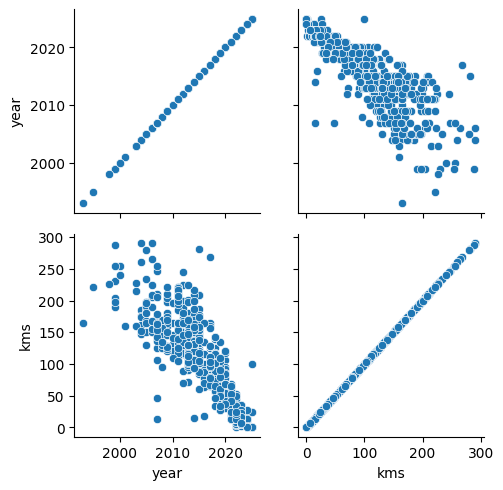

In [28]:
g = sns.PairGrid(X[['year', 'kms']])
g.map(sns.scatterplot)

In [29]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split as split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as MSE, r2_score
from sklearn.metrics import mean_absolute_error as MAE
import pickle

In [30]:
X = datacc.copy()
X = X.drop(['price'], axis=1)
print(X.shape)

Y = pd.DataFrame()
Y = datacc['price']
print(Y.shape)

(620, 4)
(620,)


In [31]:
# Data set normalization and partitioning
sc = StandardScaler()
Xsc = sc.fit(X)
Xt = Xsc.transform(X)
Xt.shape

(620, 4)

In [32]:
X_train, X_test, y_train, y_test = split(Xt,Y,
                                         test_size=0.20,
                                         random_state=42)

In [33]:
# Define model and prediction
ols = LinearRegression()
model1 = ols.fit(X_train, y_train)
y_pred1 = model1.predict(X_test)

In [34]:
# accuracy check
rmse = MSE(y_test, y_pred1, squared=False)
mae = MAE(y_test, y_pred1)
r2 = r2_score(y_test, y_pred1)
print("RMSE: %.2f" % rmse)
print("MAE: %.2f" % mae)
print("R2: %.2f" % r2)

RMSE: 37346432.89
MAE: 25280438.81
R2: 0.82


In [35]:
!pip install lightgbm

In [36]:
import lightgbm as lgb

In [37]:
# Hyperparameters
params = {
    'task': 'train',
    'boosting': 'gbdt',
    'objective': 'regression',
    'num_leaves': 10,
    'learning_rate': 0.05,
    'metric': {'l2','l1'},
    'header' : 'true',
    'verbose': 0
}

# laoding data
lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train)

# fitting the model
model2 = lgb.train(params,
                 train_set=lgb_train,
                 valid_sets=lgb_eval)
# Pred
y_pred2 = model2.predict(X_test)

In [38]:
# accuracy check
rmse = MSE(y_test, y_pred2, squared=False)
mae = MAE(y_test, y_pred2)
r2 = r2_score(y_test, y_pred2)
print("RMSE: %.2f" % rmse)
print("MAE: %.2f" % mae)
print("R2: %.2f" % r2)

RMSE: 33634390.66
MAE: 20321721.53
R2: 0.85


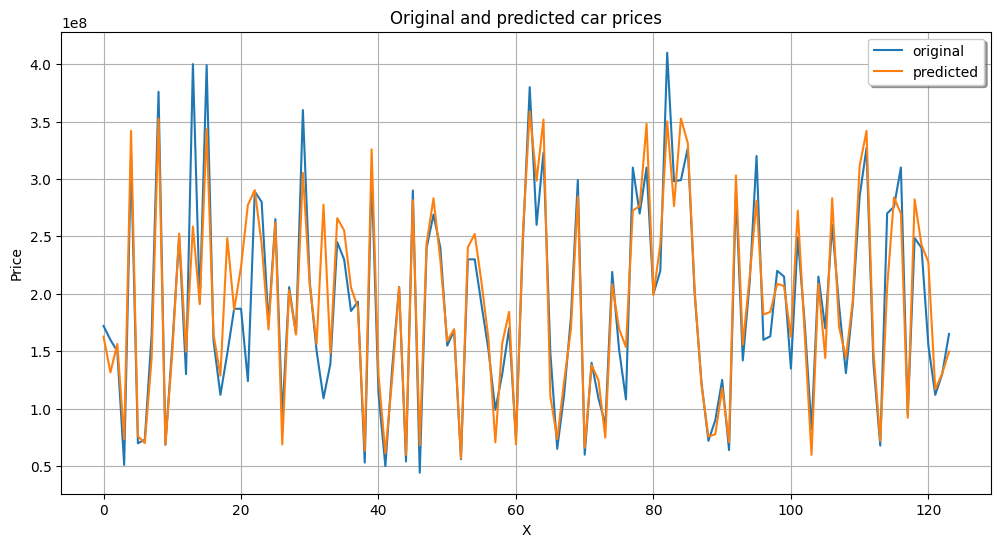

In [39]:
# visualizing in a plot
x_ax = range(len(y_test))
plt.figure(figsize=(12, 6))
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax, y_pred2, label="predicted")
plt.title("Original and predicted car prices")
plt.xlabel('X')
plt.ylabel('Price')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show()

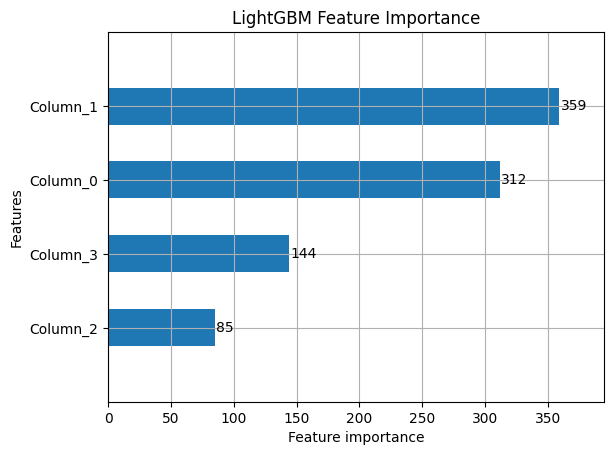

In [40]:
# plotting feature importance
ax = lgb.plot_importance(model2, height=.5, title="LightGBM Feature Importance")

<Axes: >

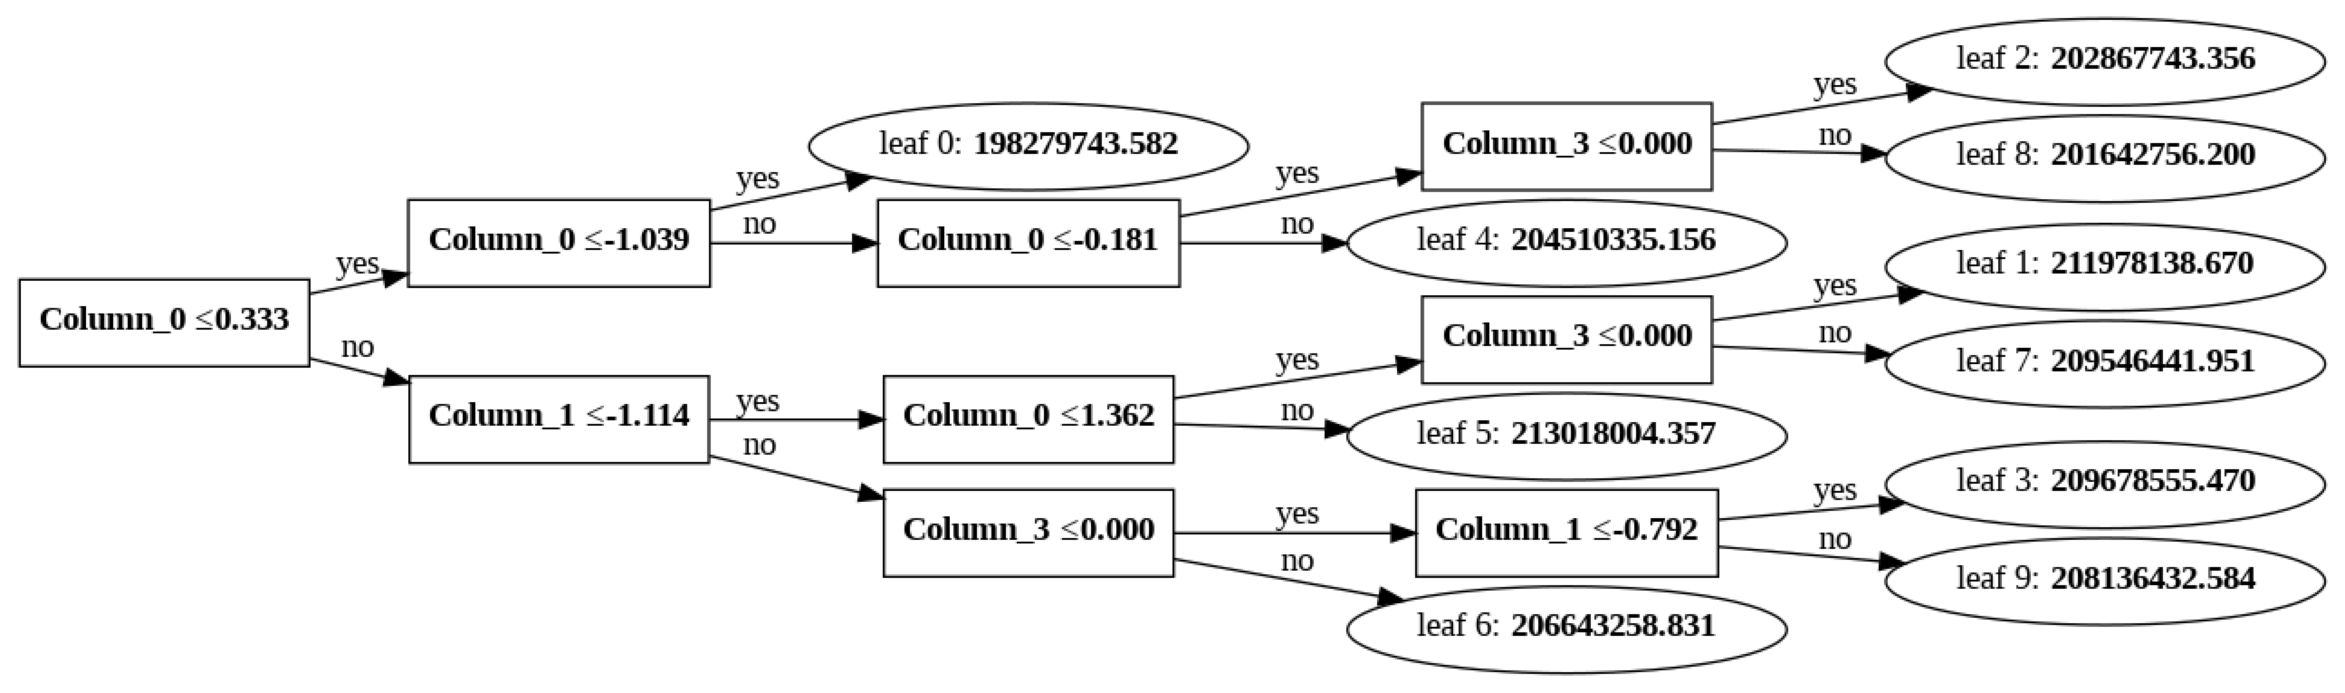

In [41]:
lgb.plot_tree(model2,figsize=(30,40))

In [42]:
from sklearn.ensemble import RandomForestRegressor

In [43]:
model3 = RandomForestRegressor()
model3.fit(X_train, y_train)
y_pred3 = model3.predict(X_test)

In [44]:
# accuracy check
rmse = MSE(y_test, y_pred3, squared=False)
mae = MAE(y_test, y_pred3)
r2 = r2_score(y_test, y_pred3)
print("RMSE: %.2f" % rmse)
print("MAE: %.2f" % mae)
print("R2: %.2f" % r2)

RMSE: 32428212.81
MAE: 19063269.75
R2: 0.86


In [45]:
with open('model3.pkl', 'wb') as f:
  pickle.dump(model3, f)

In [46]:
from sklearn.model_selection import cross_val_score, KFold
import xgboost as xgb
from sklearn.metrics import classification_report

In [47]:
#Define model
model4 = xgb.XGBRegressor(objective ='reg:squarederror',
                          booster='gbtree',
                          colsample_bytree = 1,
                          importance_type='gain',
                          learning_rate = 0.2,
                          max_depth = 5,
                          alpha = 5,
                          n_estimators = 200,
                          seed=123)

In [48]:
#Training
model4.fit(X_train, y_train)#,
#         eval_set=[(X_train, y_train), (X_test, y_test)], \
#         eval_metric='mlogloss', verbose=False)

XGBRegressor(alpha=5, base_score=None, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None, colsample_bytree=1,
             device=None, early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=None, grow_policy=None,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.2, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=200,
             n_jobs=None, num_parallel_tree=None, ...)

In [49]:
#K-fold cross validation
scores = cross_val_score(model4, X_train, y_train, cv=10)
print("Mean cross-validation score: %.2f" % scores.mean())

Mean cross-validation score: 0.84


In [50]:
kfold = KFold(n_splits=10, shuffle=True)
kf_cv_scores = cross_val_score(model4, X_train, y_train, cv=kfold )
print("K-fold CV average score: %.2f" % kf_cv_scores.mean())

K-fold CV average score: 0.85


In [51]:
# Pred
y_pred4 = model4.predict(X_test)

In [52]:
# accuracy check
rmse = MSE(y_test, y_pred4, squared=False)
mae = MAE(y_test, y_pred4)
r2 = r2_score(y_test, y_pred4)
print("RMSE: %.2f" % rmse)
print("MAE: %.2f" % mae)
print("R2: %.2f" % r2)

RMSE: 34544482.99
MAE: 21523349.56
R2: 0.85


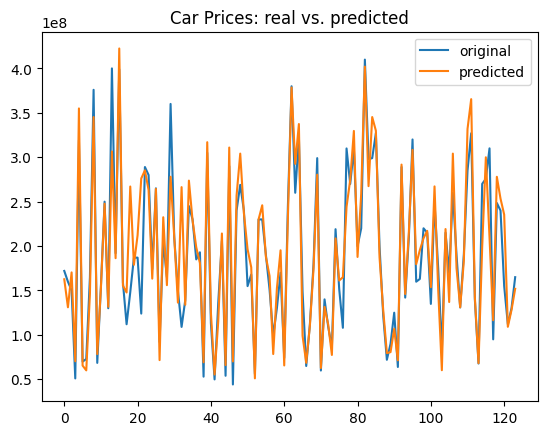

In [53]:
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax, y_pred4, label="predicted")
plt.title("Car Prices: real vs. predicted")
plt.legend()
plt.show()